# Air Quality Prediction using Machine Learning

This notebook analyzes global air pollution data and builds machine learning models to predict air quality metrics.

## Data Loading

In [2]:
%pip install seaborn
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df = pd.read_csv('global_air_pollution_with_outliers.csv')
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0.000000,Good,51.0,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1.000000,Good,41.0,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,57.332738,Good,66.0,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0.000000,Good,20.0,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0.000000,Good,6.0,Good


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             23036 non-null  object 
 1   City                23462 non-null  object 
 2   AQI Value           23463 non-null  int64  
 3   AQI Category        23463 non-null  object 
 4   CO AQI Value        23463 non-null  int64  
 5   CO AQI Category     23463 non-null  object 
 6   Ozone AQI Value     23463 non-null  int64  
 7   Ozone AQI Category  23463 non-null  object 
 8   NO2 AQI Value       23463 non-null  float64
 9   NO2 AQI Category    23463 non-null  object 
 10  PM2.5 AQI Value     23463 non-null  float64
 11  PM2.5 AQI Category  23463 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 2.1+ MB


In [5]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.749005,75.617280
std,56.055220,1.832064,28.098723,8.625314,89.855457
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,55.000000
75%,79.000000,1.000000,40.000000,4.000000,80.000000
max,500.000000,133.000000,235.000000,91.000000,972.226786


In [6]:
df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

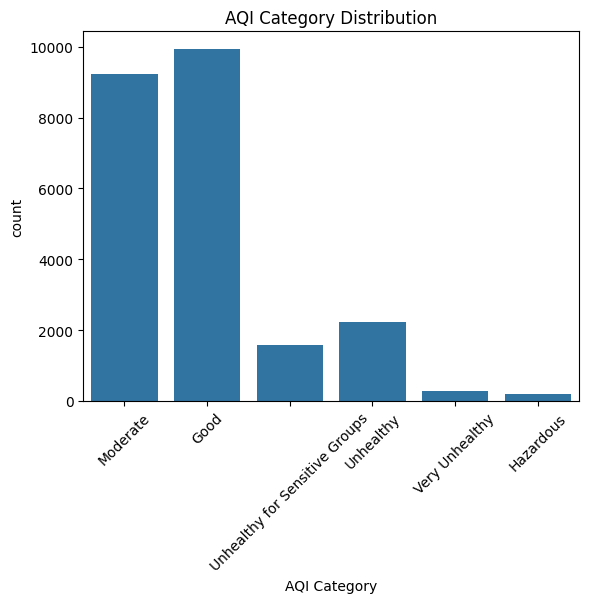

In [7]:
sns.countplot(data=df, x='AQI Category')
plt.title('AQI Category Distribution')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [8]:
# Drop rows with missing 'Country' and 'City'
df = df.dropna(subset=['Country', 'City'])

In [9]:
# Label encode categorical AQI categories
categorical_cols = ['AQI Category', 'CO AQI Category', 'Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
df = df.drop(['Country', 'City'], axis=1)

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('AQI Category', axis=1))
X = pd.DataFrame(scaled_features, columns=df.columns.drop('AQI Category'))
y = df['AQI Category']

## Model Training

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluation

In [13]:
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9997829390058607
[[1926    0    0    0    0    0]
 [   0   45    0    0    0    0]
 [   0    0 1841    0    0    0]
 [   0    0    0  405    0    0]
 [   0    0    0    0  333    0]
 [   0    1    0    0    0   56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1926
           1       0.98      1.00      0.99        45
           2       1.00      1.00      1.00      1841
           3       1.00      1.00      1.00       405
           4       1.00      1.00      1.00       333
           5       1.00      0.98      0.99        57

    accuracy                           1.00      4607
   macro avg       1.00      1.00      1.00      4607
weighted avg       1.00      1.00      1.00      4607



## Conclusion

This notebook demonstrates a complete machine learning pipeline to predict air quality categories using pollutant AQI values. Further improvements can be made with hyperparameter tuning and more advanced models.